<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 37px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  Machine Learning<br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  -<br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 25px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      <font color=orange> Airbnb Price Prediction</font>
  </div>

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 20px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      EM Lyon - Aya, Ema, Marion
  </div>

https://www.kaggle.com/stevezhenghp/airbnb-price-prediction

<a id="plan"></a>

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# base modules
import os
import copy

# custom module
from emlyon_module.imports import *
from emlyon_module.structured import *



# for Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest,chi2,f_regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# for visualization
from IPython.display import display
from matplotlib import pyplot as plt
import plotly
import plotly.express as px
import missingno as msno
from statsmodels.graphics.gofplots import qqplot

# I. Data inspection

## 1. Import the data 

In [3]:
path_to_repo = os.path.dirname(os.getcwd())
path_to_airbnb = os.path.join(path_to_repo, "data", "Airbnb", "")
path_to_datasets = os.path.join(path_to_airbnb, 'Train.csv')
df = pd.read_csv(path_to_datasets, low_memory = False)

## 2. Look at the data

In [4]:
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [5]:
df.head(3)

id  log_price property_type        room_type  \
0  6901257   5.010635     Apartment  Entire home/apt   
1  6304928   5.129899     Apartment  Entire home/apt   
2  7919400   4.976734     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude  longitude  \
0  Real Bed              strict          True  ...  40.696524 -73.991617   
1  Real Bed              strict          True  ...  40.766115 -73.989040   
2  Real Bed            moderate          True  ...  40.808110 -73.943756   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  

[3 rows x 29 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

## 3. Look at the columns

In [7]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [8]:
len(df.columns)

29

In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [10]:
df.shape

(74111, 29)

In [11]:
display_all(df.head().T)

0  \
id                                                                6901257   
log_price                                                         5.01064   
property_type                                                   Apartment   
room_type                                                 Entire home/apt   
amenities               {"Wireless Internet","Air conditioning",Kitche...   
accommodates                                                            3   
bathrooms                                                               1   
bed_type                                                         Real Bed   
cancellation_policy                                                strict   
cleaning_fee                                                         True   
city                                                                  NYC   
description             Beautiful, sunlit brownstone 1-bedroom in the ...   
first_review                                                   2016-06-18   
host_has_profile_pic                                                    t   
host_identity_verified                                                  t   
host_response_rate                                                    NaN   
host_since                                                     2012-03-26   
instant_bookable                                                        f   
last_review                                                    2016-07-18   
latitude                                                          40.6965   
longitude                                                        -73.9916   
name                                       Beautiful brownstone 1-bedroom   
neighbourhood                                            Brooklyn Heights   
number_of_reviews                                                       2   
review_scores_rating                                                  100   
thumbnail_url           https://a0.muscache.com/im/pictures/6d7cbbf7-c...   
zipcode                                                             11201   
bedrooms                                                                1   
beds                                                                    1   

                                                                        1  \
id                                                                6304928   
log_price                                                          5.1299   
property_type                                                   Apartment   
room_type                                                 Entire home/apt   
amenities               {"Wireless Internet","Air conditioning",Kitche...   
accommodates                                                            7   
bathrooms                                                               1   
bed_type                                                         Real Bed   
cancellation_policy                                                strict   
cleaning_fee                                                         True   
city                                                                  NYC   
description             Enjoy travelling during your stay in Manhattan...   
first_review                                                   2017-08-05   
host_has_profile_pic                                                    t   
host_identity_verified                                                  f   
host_response_rate                                                   100%   
host_since                                                     2017-06-19   
instant_bookable                                                        t   
last_review                                                    2017-09-23   
latitude                                                          40.7661   
longitude                                                         -73.989   
name                             Superb 3BR Apt Located Near Times 

In [12]:
display_all(df.describe(include='all').T)

count unique  \
id                      74111    NaN   
log_price               74111    NaN   
property_type           74111     35   
room_type               74111      3   
amenities               74111  67122   
accommodates            74111    NaN   
bathrooms               73911    NaN   
bed_type                74111      5   
cancellation_policy     74111      5   
cleaning_fee            74111      2   
city                    74111      6   
description             74111  73479   
first_review            58247   2554   
host_has_profile_pic    73923      2   
host_identity_verified  73923      2   
host_response_rate      55812     80   
host_since              73923   3087   
instant_bookable        74111      2   
last_review             58284   1371   
latitude                74111    NaN   
longitude               74111    NaN   
name                    74111  73359   
neighbourhood           67239    619   
number_of_reviews       74111    NaN   
review_scores_rating    57389    NaN   
thumbnail_url           65895  65883   
zipcode                 73145    769   
bedrooms                74020    NaN   
beds                    73980    NaN   

                                                                      top  \
id                                                                    NaN   
log_price                                                             NaN   
property_type                                                   Apartment   
room_type                                                 Entire home/apt   
amenities                                                              {}   
accommodates                                                          NaN   
bathrooms                                                             NaN   
bed_type                                                         Real Bed   
cancellation_policy                                                strict   
cleaning_fee                                                         True   
city                                                                  NYC   
description             Hello, I've been running guest house for Korea...   
first_review                                                   2017-01-01   
host_has_profile_pic                                                    t   
host_identity_verified                                                  t   
host_response_rate                                                   100%   
host_since                                                     2015-03-30   
instant_bookable                                                        f   
last_review                                                    2017-04-30   
latitude                                                              NaN   
longitude                                                             NaN   
name                               Bunk bed in the Treat Street Clubhouse   
neighbourhood                                                Williamsburg   
number_of_reviews                                                     NaN   
review_scores_rating                                                  NaN   
thumbnail_url           https://a0.muscache.com/im/pictures/70087089/b...   
zipcode                                                           11211.0   
bedrooms                                                              NaN   
beds                                                                  NaN   

                         freq         mean          std      min          25%  \
id                        NaN  1.12666e+07  6.08173e+06      344  6.26196e+06   
log_price                 NaN      4.78207     0.717394        0      4.31749   
property_type           49003          NaN          NaN      NaN          NaN   
room_type               41310          NaN          NaN      NaN          NaN   
amenities                 586          NaN          NaN      NaN          NaN   
accommodates              

## 4. Exploratory data analysis

### 1. Map

Cette map permet de visualiser nos différents biens airbnb de notre BDD en fonction de leurs coordonnées géographiques (latitude & longitude). Pour chaque bien, il est possible d'afficher les coordonnées gps et le prix du bien (log_price). 

N.B : Les points indiquant les biens sont colorés en fonction du prix, permettant une meilleure représentation du prix des biens en fonction de leur localisation. 

Source : https://www.kaggle.com/max398434434/airbnb-eda-and-price-prediction

In [15]:
#map

def create_map(ville):
    voir_prix = lambda x: 'prix : ' + str(round(x, 2))

    if ville in {'NYC', 'LA', 'SF', 'DC', 'Chicago'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = df[df['city'] == ville].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["log_price"],
                            color='log_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {ville}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_geos(fitbounds="locations")
    fig.show()

In [16]:
create_map('DC')

In [17]:
create_map('NYC')

In [18]:
create_map('SF')

### 2. Look at the variable to predict

Notre variable à prédire sera le prix des biens airbnb. On regarde alors la distribution de notre variable prix (log_price). 

/Users/emafagoul/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



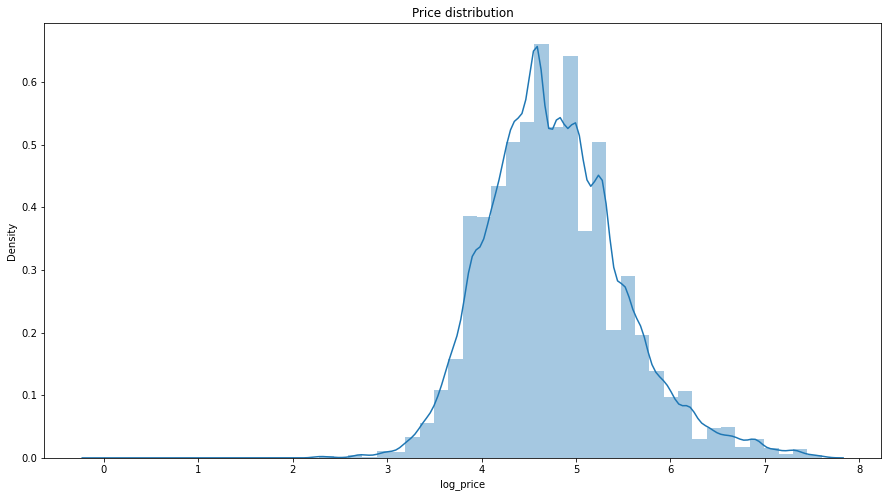

In [17]:
plt.figure(figsize = (15, 8))
sns.distplot(df['log_price'])
plt.title('Price distribution')
plt.show()

/Users/emafagoul/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



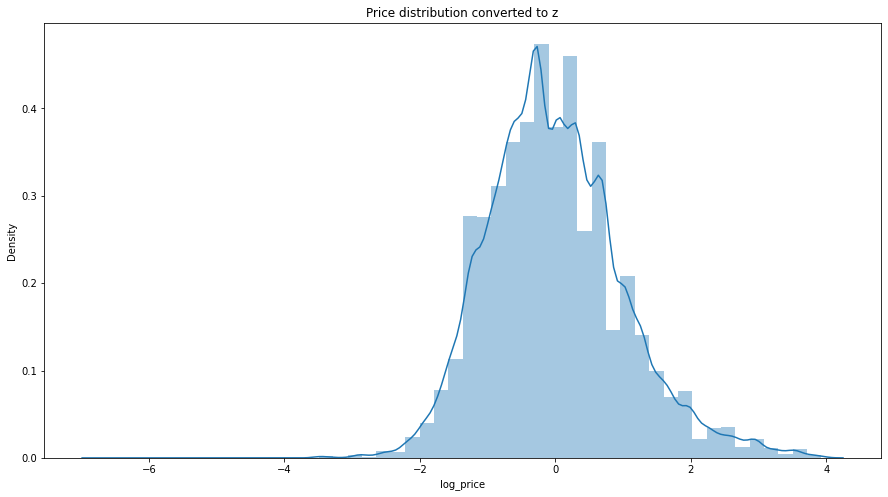

In [20]:
plt.figure(figsize = (15, 8))
sns.distplot((df['log_price']-np.mean(df['log_price'])) / np.std(df['log_price']))
plt.title('Price distribution converted to z')
plt.show()

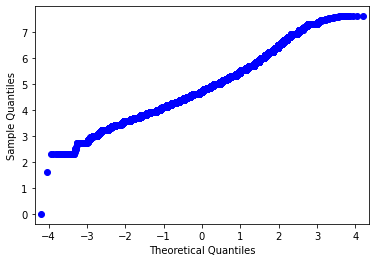

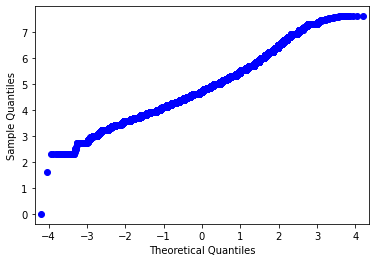

In [21]:
# qqplot

qqplot(df['log_price'])

On peut voir que la distribution de la variable prix suit à peu près une loi normale.

### 4. Heatmap 

La heatmap va nous permettre de regarder la corrélation entre nos différentes variables.

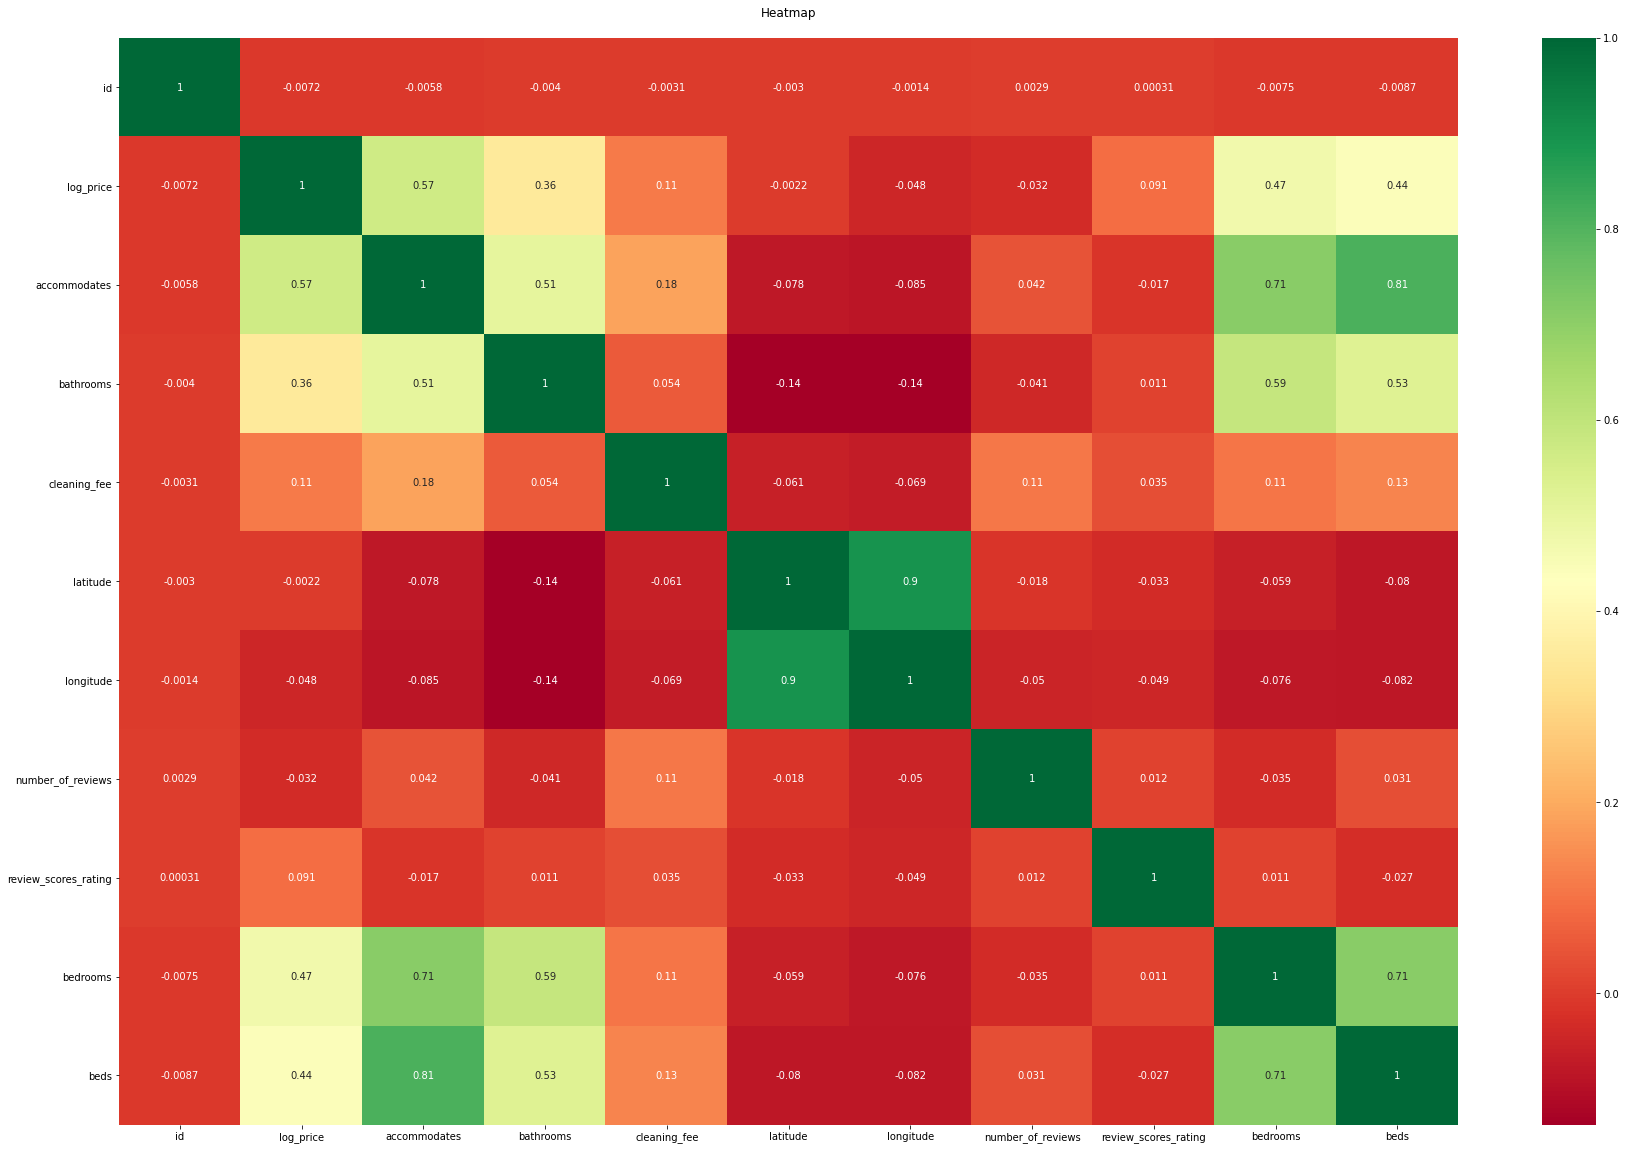

In [22]:
plt.figure(figsize=[30,20])
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Heatmap\n')
plt.show()

On peut observer grâce à la heatmap que la variable log_price est fortement corrélée aux variables suivantes :
- beds
- bedrooms
- bathrooms 
- accommodates 

N.B : Les prix sont donc fortement corrélés à ces facteurs. Il faudra en tenir compte pour nos prédictions. 
<br>

Pour l'étape du preprocessing de nos données, on peut noter que :
- Les variables beds et bedrooms sont fortemment correlées : 0.71
- Les variables beds et accommodates sont fortemment correlées : 0.81
- Les variables bedrooms et bathrooms sont fortemment correlées : 0.59
- Les variables bedrooms et accommodates sont fortemment correlées : 0.71

N.B : toutes ces remarques nous seront utiles pour la partie preprocessing, notamment pour le traitement des valeurs manquantes et pour la selection de nos colonnes. 


### 5. Pairplot

Pairplot nous permet de visualiser nos données pour trouver les relations entre elles. L'avantage est que cela nous permet de voir la corrélation aussi bien pour les données continues que les données catégoriques.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



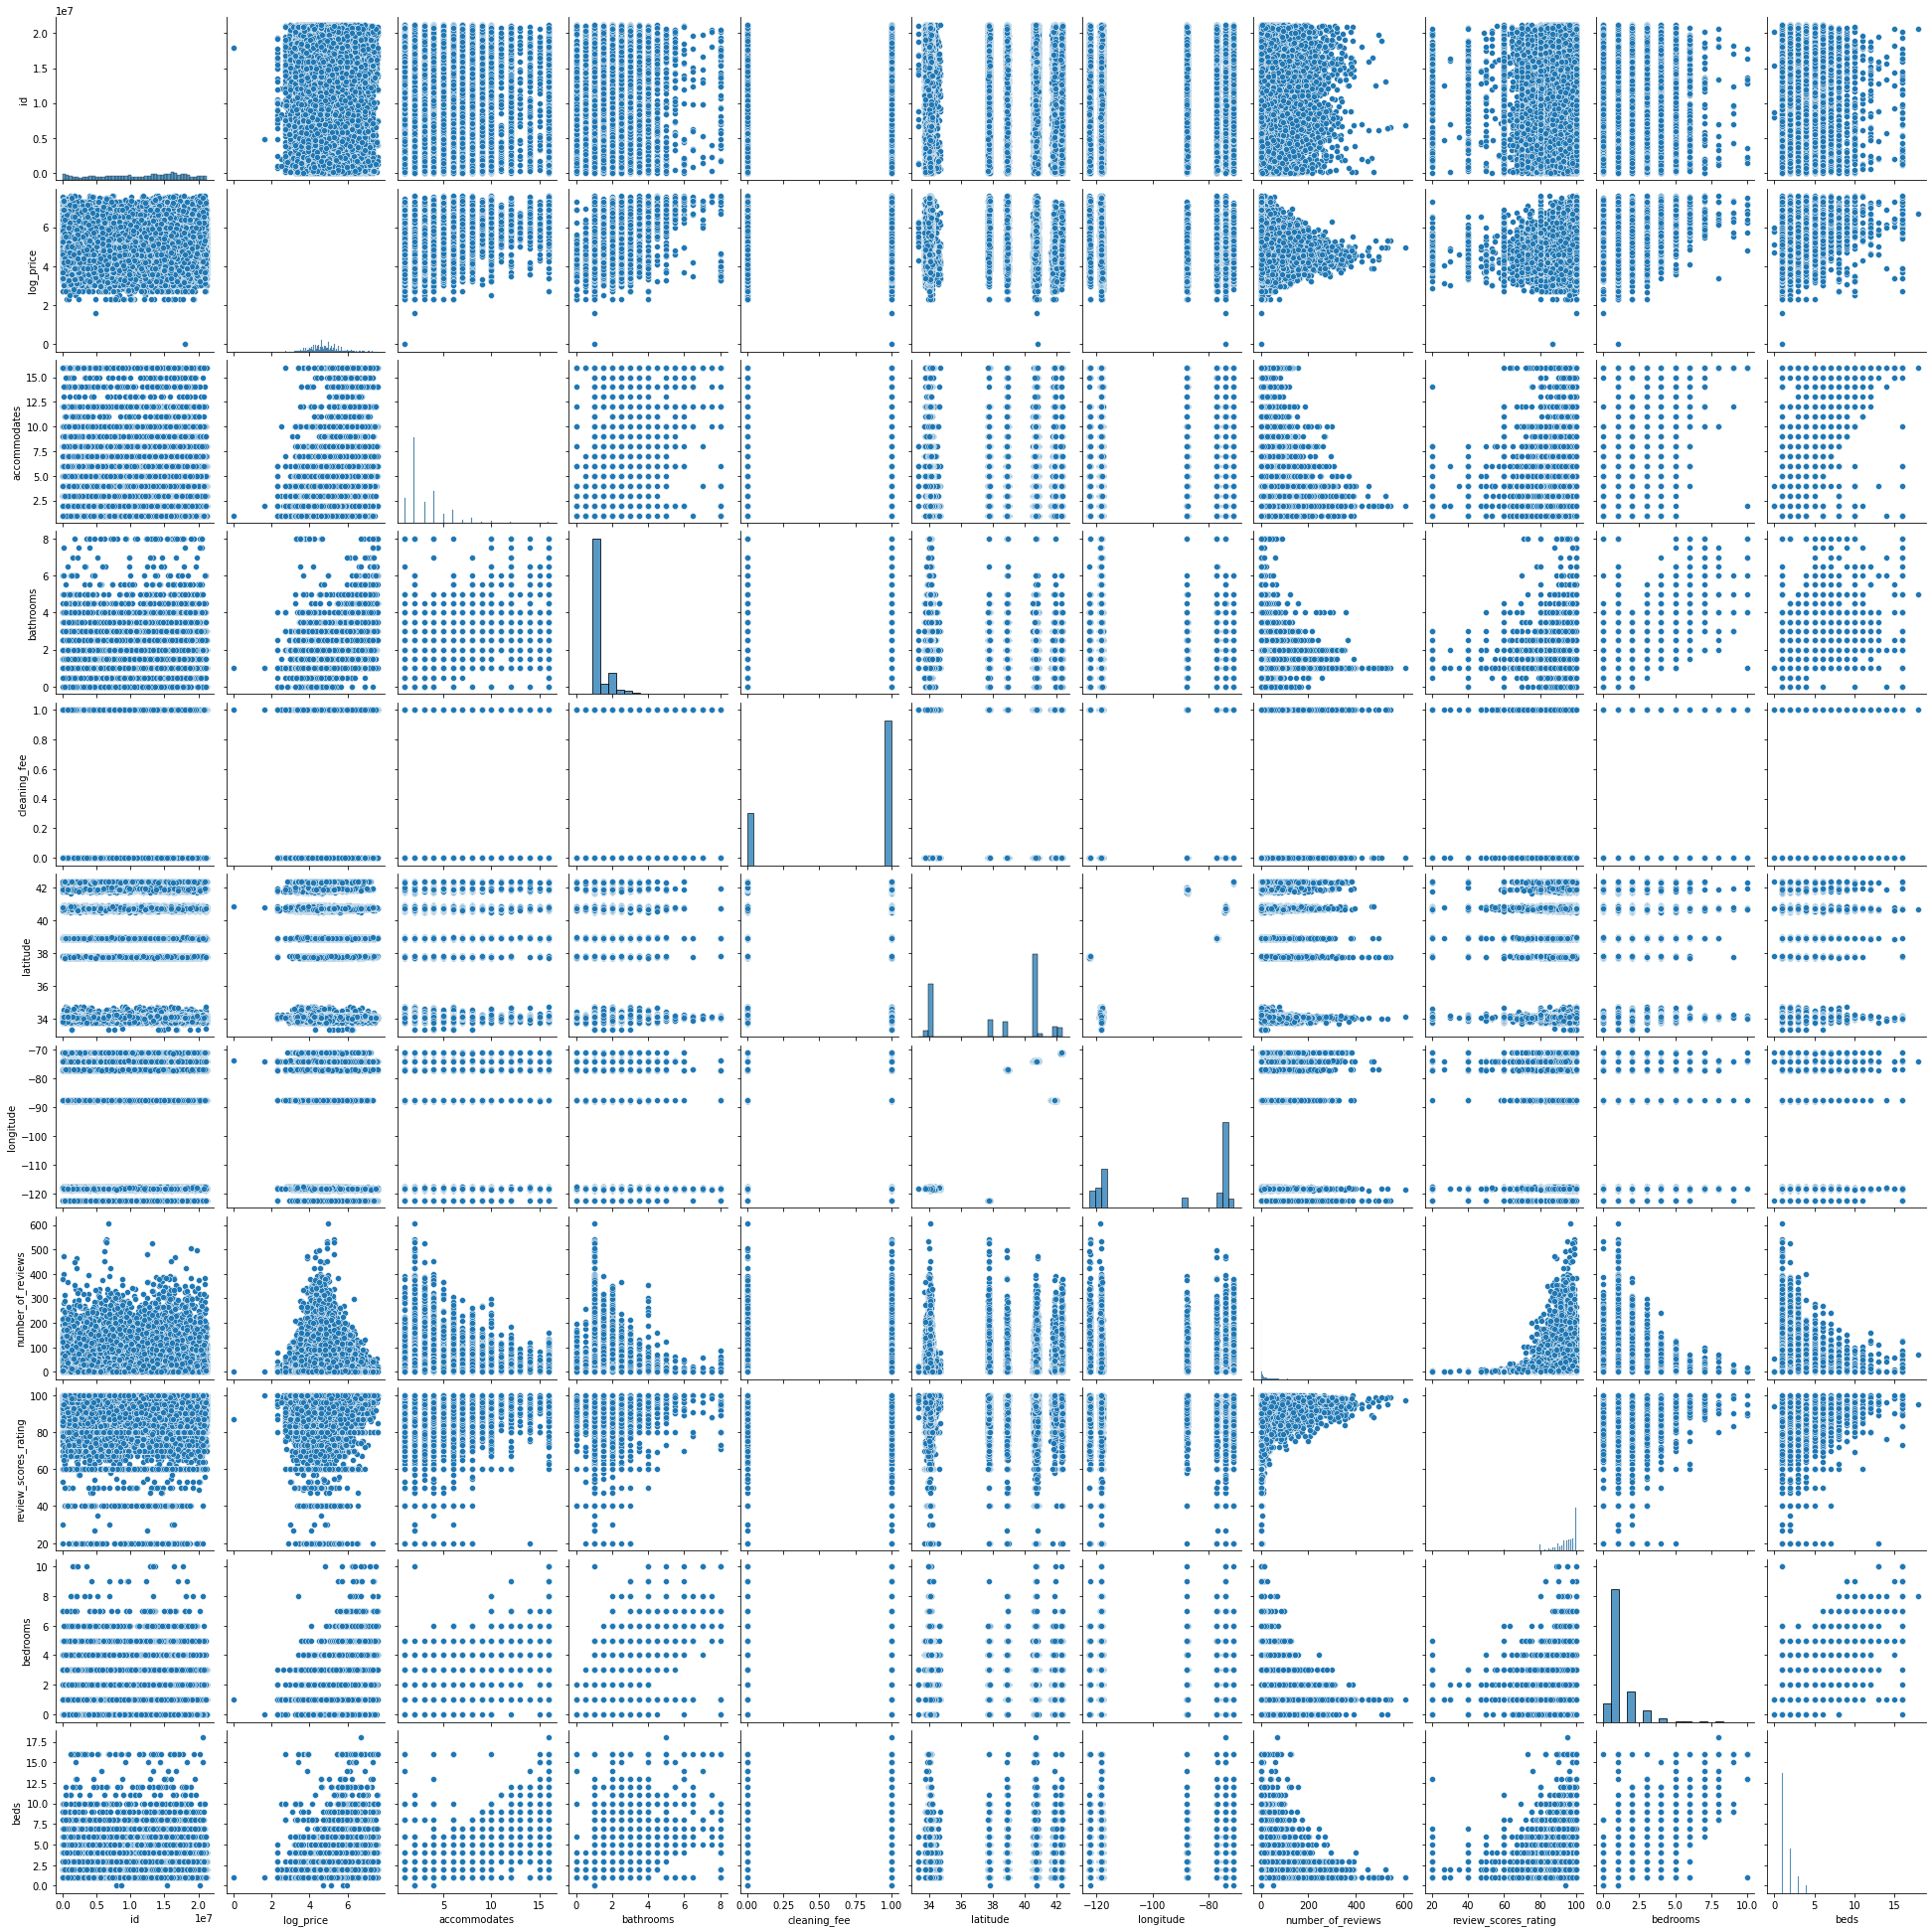

In [23]:
sns.pairplot(df)
plt.show()

### 6. Correlation barth graph

Ce premier graphique nous permet de voir plus précisément la corrélation entre notre variable de prédiction (log_price) et les autres variables. 

- Variable to predict : log_price

<AxesSubplot:>

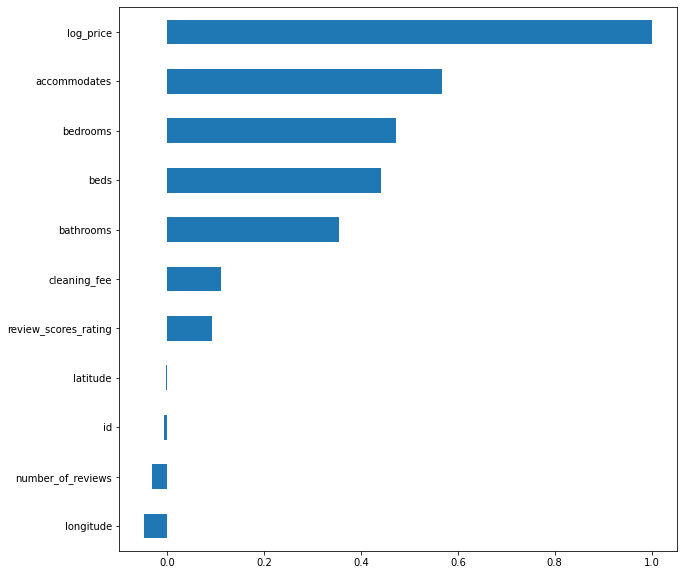

In [24]:
plt.figure(figsize=(10,10))
df.corr()["log_price"].sort_values().plot(kind="barh")

Nous avons également tracé les graphiques par rapport aux variables qui étaient fortemement correlées à notre variable de prédiction (log_price). 

Cette étude de corrélation nous permettra d'appréhender le traitement des valeurs manquantes pour ces variables indispensables à la prédiction du prix. 

- accomodates

<AxesSubplot:>

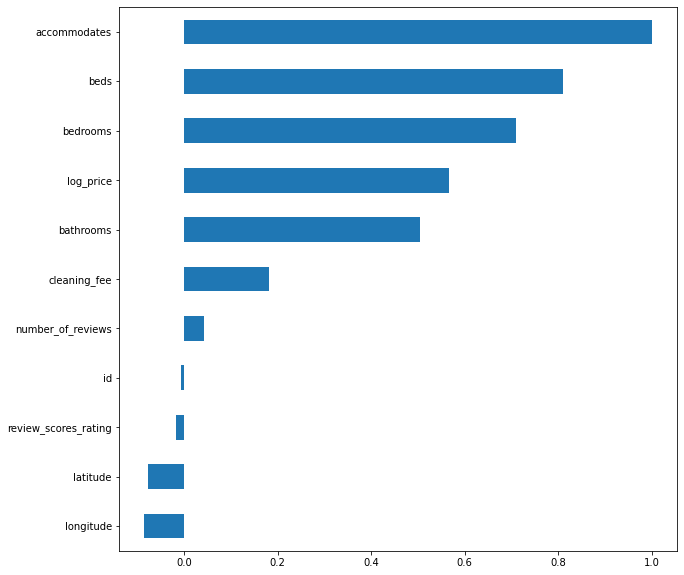

In [25]:
plt.figure(figsize=(10,10))
df.corr()["accommodates"].sort_values().plot(kind="barh")

- bedrooms

<AxesSubplot:>

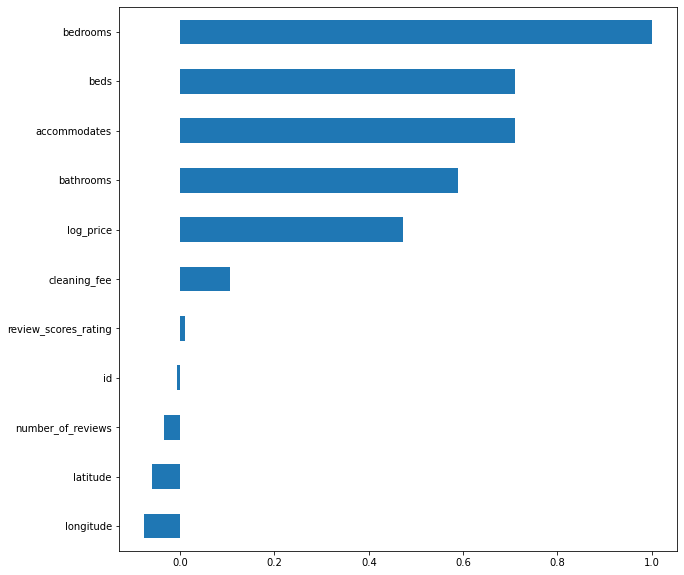

In [26]:
plt.figure(figsize=(10,10))
df.corr()["bedrooms"].sort_values().plot(kind="barh")

- beds

<AxesSubplot:>

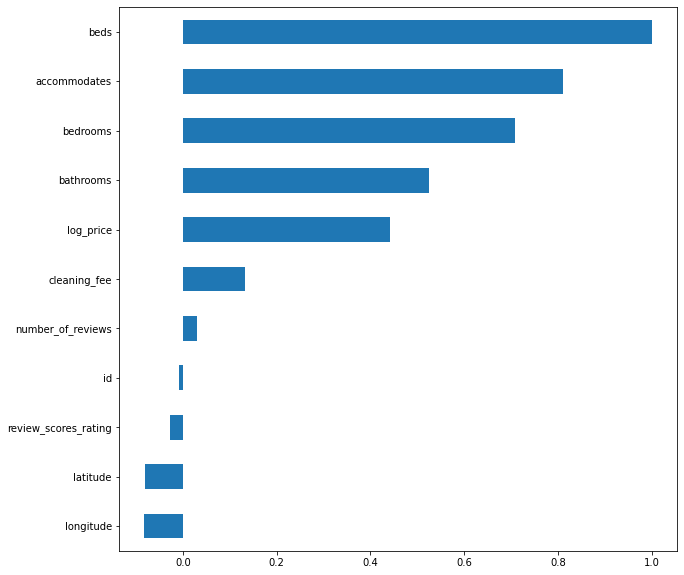

In [27]:
plt.figure(figsize=(10,10))
df.corr()["beds"].sort_values().plot(kind="barh")

### 7. Univariate analysis

Nous faisons des analyses univariées pour visualiser rapidement la structure de nos données. 

- Cities

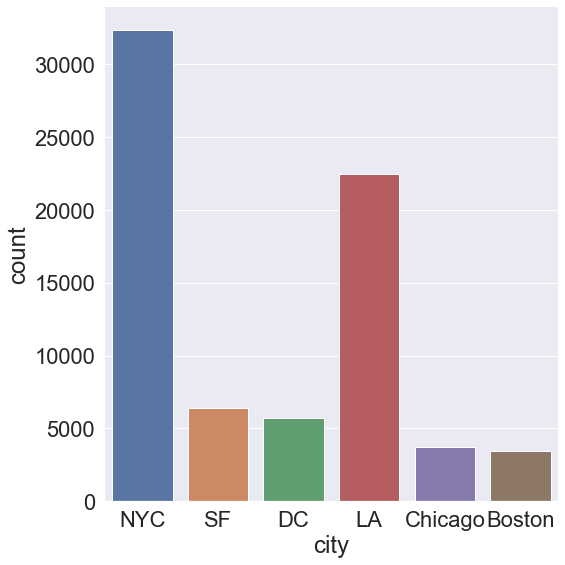

In [28]:
sns.set(font_scale=2)
sns.catplot(x = "city", kind="count", data=df,height=8)

- Accomodates

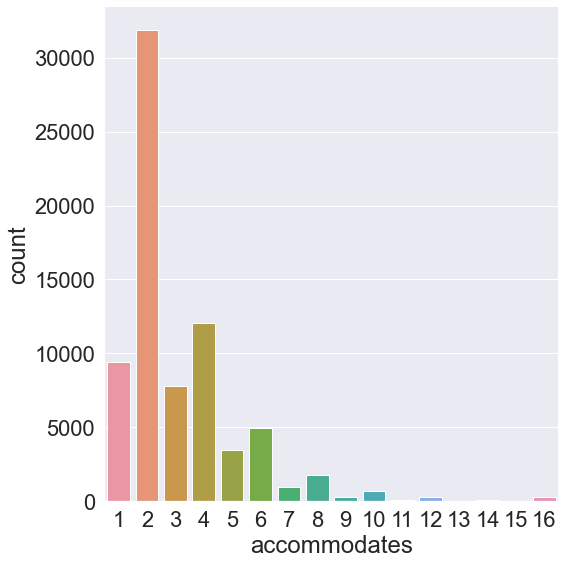

In [29]:
sns.set(font_scale=2)
sns.catplot(x = "accommodates", kind="count", data=df,height=8)

- Bedrooms

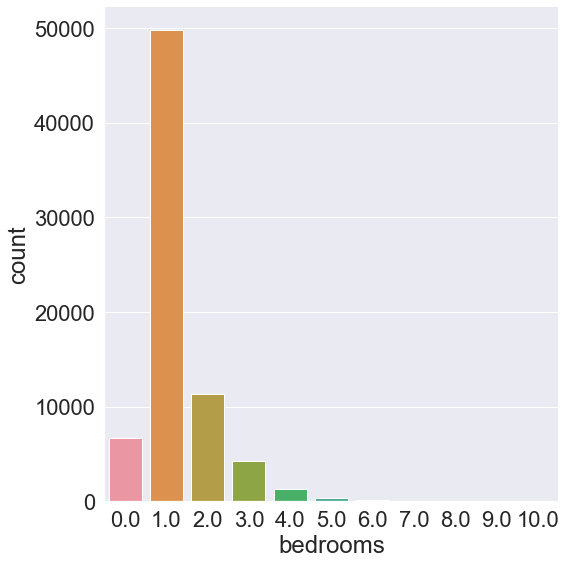

In [30]:
sns.set(font_scale=2)
sns.catplot(x = "bedrooms", kind="count", data=df,height=8)

# II. Data preprocessing

## 1. Variable to predict

La variable que nous voulons prédire est le prix d'un bien airbnb, en fonction de sa description. Cela signifie que nous cherchons à prédire des valeurs dans la colonne log_price de l'ensemble de données, en utilisant les autres colonnes comme variables expainatoires pour la prédiction.

In [31]:
df.log_price

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 74111, dtype: float64

## 2. Columns selection

Nous droppons les colonnes : 
- 'id','name','thumbnail_url','description' puisqu'elles ne présentent pas d'intérêt significatif pour la prédiction du prix (voir étude de corrélation précédente). 
- 'first_review','last_review','host_since' puisqu'elles n'aident pas dans la prédiction du prix. De plus, il y a énormément de valeurs manquantes (20%) ce qui rend le traitement de la colonne difficile. 
- 'neighbourhood' puisqu'il y a déjà 4 autres colonnes qui traitent de la localisation. De plus, il est difficile de remplacer et de traiter les valeurs manquantes. 

In [32]:
#Colonnes à dropper car elles n'aident pas dans la prédiction de prix

df.drop(['id','name','thumbnail_url','description','first_review','last_review','host_since','neighbourhood'],axis=1,inplace=True)

## 3. Cleaning columns categories

- Création d'une fonction to bool dont l'objectif est de remplacer les strings représentants des booléennes dans certaines colonnes par de vraies booléennes. 

In [33]:
def to_bool(x):
        if x == 't' :
            return True
        else:
            return False

In [34]:
df[['host_has_profile_pic','host_identity_verified','instant_bookable']]=df[['host_has_profile_pic','host_identity_verified','instant_bookable']].applymap(to_bool)

- To float

In [35]:
def convert_rate(x):
    x=str(x)
    if x[-1]=='%': 
        return float(x.strip('%'))
    else:
        return float(x)        

In [36]:
df['host_response_rate']=df['host_response_rate'].apply(convert_rate)

In [37]:
def clean_zip(x):
    try: 
        float(x)
        return float(x)
    except ValueError:
        return np.nan

In [38]:
df['zipcode']=df['zipcode'].apply(clean_zip)

- On nettoie la colonne 'amenities' qui présente les équipements d'un airbnb. Ici, l'objectif est d'avoir le nombre d'équipements dont dispose chaque Airbnb plutôt que la liste des amenities.

In [39]:
df['amenities']=df['amenities'].str.replace('[}".:{]','').str.replace(' ','_').str.replace(',',' ').str.lower()

cv=CountVectorizer()
cv_transformed=cv.fit_transform(df['amenities']) 

cv_df=pd.DataFrame(cv_transformed.toarray(),columns=cv.get_feature_names()).add_prefix("a_")

df.amenities=cv_df.sum(axis=1)

In [40]:
df.amenities

0        10
1        16
2        21
3        16
4        12
         ..
74106     0
74107    17
74108    33
74109    15
74110    21
Name: amenities, Length: 74111, dtype: int64

## 4. Missing values traitment

In [41]:
df.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
instant_bookable              0
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
zipcode                     987
bedrooms                     91
beds                        131
dtype: int64

- Traitement des valeurs manquantes dans la colonne 'bathrooms'

In [42]:
display_all(df[df['bathrooms'].isna()][['bathrooms','beds','bedrooms']])

bathrooms  beds  bedrooms
33           NaN   1.0       1.0
38           NaN   1.0       1.0
378          NaN   NaN       1.0
644          NaN   1.0       1.0
1351         NaN   1.0       1.0
1824         NaN   NaN       1.0
2037         NaN   1.0       1.0
2355         NaN   1.0       1.0
2368         NaN   NaN       NaN
2842         NaN   1.0       NaN
3150         NaN   NaN       1.0
4631         NaN   NaN       1.0
4757         NaN   NaN       1.0
5234         NaN   2.0       2.0
5462         NaN   1.0       1.0
5771         NaN   1.0       1.0
6353         NaN   1.0       1.0
6441         NaN   1.0       1.0
6858         NaN   1.0       1.0
7157         NaN   1.0       1.0
7329         NaN   1.0       1.0
7697         NaN   NaN       1.0
7706         NaN   NaN       1.0
7923         NaN   1.0       1.0
8190         NaN   1.0       1.0
8238         NaN   1.0       1.0
8537         NaN   NaN       1.0
8761         NaN   2.0       2.0
9008         NaN   1.0       1.0
9615         NaN   1.0       1.0
10110        NaN   NaN       1.0
10556        NaN   NaN       1.0
10954        NaN   1.0       1.0
10957        NaN   1.0       1.0
11089        NaN   1.0       1.0
11727        NaN   1.0       1.0
12351        NaN   NaN       1.0
12844        NaN   1.0       1.0
13081        NaN   NaN       1.0
13163        NaN   1.0       1.0
13634        NaN   2.0       2.0
13660        NaN   2.0       1.0
13816        NaN   1.0       1.0
14052        NaN   1.0       1.0
14160        NaN   1.0       1.0
14714        NaN   1.0       1.0
15044        NaN   1.0       1.0
15603        NaN   1.0       1.0
15690        NaN   1.0       1.0
15703        NaN   NaN       1.0
15706        NaN   2.0       1.0
15921        NaN   1.0       1.0
16717        NaN   1.0       1.0
17338        NaN   1.0       1.0
17579        NaN   1.0       1.0
17912        NaN   NaN       1.0
19362        NaN   1.0       1.0
19710        NaN   3.0       1.0
19906        NaN   2.0       1.0
19932        NaN   1.0       1.0
19963        NaN   1.0       1.0
20017        NaN   NaN       1.0
20629        NaN   1.0       1.0
20753        NaN   1.0       1.0
20914        NaN   2.0       1.0
21016        NaN   NaN       4.0
21533        NaN   NaN       1.0
21581        NaN   1.0       1.0
21699        NaN   1.0       1.0
22000        NaN   NaN       1.0
22225        NaN   1.0       1.0
22470        NaN   1.0       1.0
23709        NaN   1.0       1.0
23839        NaN   NaN       1.0
24116        NaN   1.0       1.0
24208        NaN   NaN       NaN
24427        NaN   1.0       1.0
24876        NaN   1.0       1.0
25147        NaN   1.0       1.0
25178        NaN   1.0       1.0
26395        NaN   1.0       1.0
26628        NaN   1.0       1.0
26707        NaN   1.0       1.0
26773        NaN   2.0       2.0
27234        NaN   1.0       1.0
27858        NaN   1.0       1.0
28393        NaN   1.0       1.0
28955        NaN   NaN       1.0
28963        NaN   1.0       1.0
28974        NaN   1.0       1.0
29322        NaN   1.0       1.0
30021        NaN   1.0       1.0
30472        NaN   1.0       1.0
30474        NaN   2.0       1.0
30856        NaN   2.0       1.0
31422        NaN   NaN       2.0
31613        NaN   1.0       1.0
31904        NaN   1.0       1.0
33031        NaN   NaN       2.0
33296        NaN   NaN       1.0
33835        NaN   1.0       NaN
34211        NaN   1.0       3.0
34221        NaN   1.0       1.0
34502        NaN   1.0       1.0
34922        NaN   2.0       1.0
35124        NaN   NaN       1.0
35321        NaN   NaN       1.0
35433        NaN   1.0       1.0
36433        NaN   1.0       1.0
36547        NaN   1.0       1.0
36562        NaN   1.0       1.0
36672        NaN   1.0       1.0
36866        NaN   1.0       1.0
37100        NaN   1.0       1.0
37118        NaN   1.0       2.0
37954        NaN   1.0       1.0
38661        NaN   1.0       1.0
39363        NaN   1.0       2.0
40052        NaN   1.0       1.0
40219        NaN   1.0       1.0
41606        N

In [43]:
# Les valeurs manquantes de bathrooms correpondent aux Airbnb avec 1 à 2 lits. 
# Avec l'étude de corrélation effectuée précedemment, nous pouvons imaginer qu'il y a donc une salle de bain. 

df['bathrooms'].fillna(1,inplace=True)

- Traitement des valeurs manquantes dans les colonnes 'bedrooms' & 'beds'

In [44]:
display_all(df[df['bedrooms'].isna()][['bedrooms','beds','property_type','bathrooms']])

bedrooms  beds property_type  bathrooms
200         NaN   1.0     Apartment        1.0
301         NaN   NaN     Apartment        1.0
2368        NaN   NaN     Apartment        1.0
2842        NaN   1.0     Apartment        1.0
3331        NaN   1.0     Apartment        1.0
6647        NaN   1.0     Apartment        1.0
7155        NaN   1.0     Apartment        1.0
8807        NaN   1.0     Apartment        1.0
10513       NaN   1.0          Loft        1.0
11584       NaN   NaN         Other        1.0
11766       NaN   NaN     Apartment        1.0
12942       NaN   2.0     Apartment        1.0
13920       NaN   NaN     Apartment        1.0
16912       NaN   NaN     Apartment        1.0
17366       NaN   NaN     Apartment        1.0
18309       NaN   1.0     Apartment        1.0
18882       NaN   2.0     Apartment        1.0
19518       NaN   NaN     Apartment        1.0
19579       NaN   1.0     Apartment        1.0
19655       NaN   1.0     Apartment        1.0
21978       NaN   1.0     Apartment        1.0
22081       NaN   NaN     Apartment        1.0
23467       NaN   2.0     Apartment        1.0
23718       NaN   2.0          Loft        1.0
23890       NaN   1.0     Apartment        1.0
24208       NaN   NaN     Apartment        1.0
24271       NaN   1.0     Apartment        1.0
24831       NaN   1.0         House        1.0
25806       NaN   NaN         House        1.0
26549       NaN   1.0         House        1.0
28273       NaN   NaN     Apartment        1.0
28597       NaN   NaN     Apartment        1.0
30072       NaN   NaN     Apartment        1.0
31621       NaN   1.0         House        1.0
33017       NaN   NaN         Villa        1.0
33525       NaN   NaN         House        1.0
33766       NaN   1.0     Apartment        1.0
33835       NaN   1.0     Apartment        1.0
34869       NaN   1.0     Apartment        1.0
35485       NaN   2.0     Apartment        1.0
35639       NaN   1.0     Apartment        1.0
35976       NaN   2.0      Bungalow        1.0
36416       NaN   NaN     Apartment        1.0
36516       NaN   1.0     Apartment        1.0
36953       NaN   1.0     Apartment        1.0
37033       NaN   1.0     Apartment        1.0
37251       NaN   2.0     Apartment        1.0
39272       NaN   1.0     Apartment        1.0
39287       NaN   NaN   Condominium        1.0
39408       NaN   3.0     Apartment        1.0
40192       NaN   NaN     Apartment        1.5
41955       NaN   2.0     Apartment        1.0
43153       NaN   1.0     Apartment        1.0
43183       NaN   NaN     Apartment        1.5
43541       NaN   NaN     Apartment        1.0
44450       NaN   1.0     Apartment        1.0
45280       NaN   1.0     Apartment        1.0
46060       NaN   NaN     Apartment        1.0
46757       NaN   1.0     Apartment        1.0
46854       NaN   1.0     Apartment        1.0
48540       NaN   2.0     Apartment        1.0
49123       NaN   1.0     Apartment        1.0
50039       NaN   2.0     Apartment        1.0
50569       NaN   NaN     Apartment        1.0
51751       NaN   1.0         House        1.0
52140       NaN   1.0         House        1.0
53979       NaN   1.0     Apartment        1.0
54220       NaN   1.0     Apartment        1.0
54620       NaN   NaN     Apartment        1.0
54685       NaN   1.0     Apartment        1.0
55290       NaN   1.0         House        1.0
55660       NaN   1.0     Apartment        1.0
56854       NaN   1.0     Apartment        1.0
56903       NaN   1.0     Apartment        1.0
56921       NaN   NaN     Apartment        1.0
56938       NaN   1.0     Apartment        1.0
57038       NaN   4.0     Apartment        1.0
58125       NaN   NaN     Apartment        1.0
58811       NaN   1.0     Apartment        1.0
59070       NaN   NaN         Other        1.0
62273       NaN   1.0     Apartment        1.0
62370       NaN   1.0     Apartment        1.0
63433       NaN   2.0     Apartment        1.0
67274       NaN   2.0     Apartment        1.0
69990       

In [45]:
# On remarque que, souvent, quand le nombre de chambres est indiqué, le nombre de lit ne l'est pas et inversement. 
# On peut donc remplacer les valeurs manquantes selon ce qui a été rempli dans l'une des deux colonnes (voir étude de corrélation)

df['bedrooms'].fillna(df['beds'],inplace=True)
df['beds'].fillna(df['bedrooms'],inplace=True)

In [46]:
display_all(df[df['bedrooms'].isna()][['bedrooms','beds','property_type','bathrooms']])

bedrooms  beds property_type  bathrooms
301         NaN   NaN     Apartment        1.0
2368        NaN   NaN     Apartment        1.0
11584       NaN   NaN         Other        1.0
11766       NaN   NaN     Apartment        1.0
13920       NaN   NaN     Apartment        1.0
16912       NaN   NaN     Apartment        1.0
17366       NaN   NaN     Apartment        1.0
19518       NaN   NaN     Apartment        1.0
22081       NaN   NaN     Apartment        1.0
24208       NaN   NaN     Apartment        1.0
25806       NaN   NaN         House        1.0
28273       NaN   NaN     Apartment        1.0
28597       NaN   NaN     Apartment        1.0
30072       NaN   NaN     Apartment        1.0
33017       NaN   NaN         Villa        1.0
33525       NaN   NaN         House        1.0
36416       NaN   NaN     Apartment        1.0
39287       NaN   NaN   Condominium        1.0
40192       NaN   NaN     Apartment        1.5
43183       NaN   NaN     Apartment        1.5
43541       NaN   NaN     Apartment        1.0
46060       NaN   NaN     Apartment        1.0
50569       NaN   NaN     Apartment        1.0
54620       NaN   NaN     Apartment        1.0
56921       NaN   NaN     Apartment        1.0
58125       NaN   NaN     Apartment        1.0
59070       NaN   NaN         Other        1.0
70535       NaN   NaN         House        1.0
73462       NaN   NaN     Apartment        1.0

In [47]:
# Par rapport au nombre de salle de bain, on remplit le reste des valeurs manquantes par 1. 

df[['beds','bedrooms']]=df[['beds','bedrooms']].fillna(1)

- Zipcode : On supprime les lignes pour lesquels il y a des valeurs manquantes dans la mesure où il n'y en a pas beaucoup.

In [48]:
df.dropna(subset=['zipcode'],inplace=True)

- Review_scores_rating

In [49]:
df[df['number_of_reviews']==0][['review_scores_rating','number_of_reviews']]

review_scores_rating  number_of_reviews
3                       NaN                  0
12                      NaN                  0
15                      NaN                  0
24                      NaN                  0
31                      NaN                  0
...                     ...                ...
74081                   NaN                  0
74089                   NaN                  0
74095                   NaN                  0
74106                   NaN                  0
74109                   NaN                  0

[15542 rows x 2 columns]

In [50]:
# On comprend que les valeurs manquantes pour review_scores_rating sont souvent liées à l'absence de review.
# On remplace donc par 0 ou par la moyenne le cas échéant.

df.loc[df['number_of_reviews']==0,'review_scores_rating']=df.loc[df['number_of_reviews']==0,'review_scores_rating'].fillna(0)
df['review_scores_rating'].fillna(np.mean(df['review_scores_rating']),inplace=True)

- Host_response_rate : 
la meilleure option ici est de remplacer par la moyenne

In [51]:
df['host_response_rate'].fillna(np.mean(df['host_response_rate']),inplace=True)

In [52]:
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

## 5. Fully numericalize data 

In [53]:
display_all(df.head())

log_price property_type        room_type  amenities  accommodates  \
0   5.010635     Apartment  Entire home/apt         10             3   
1   5.129899     Apartment  Entire home/apt         16             7   
2   4.976734     Apartment  Entire home/apt         21             5   
3   6.620073         House  Entire home/apt         16             4   
4   4.744932     Apartment  Entire home/apt         12             2   

   bathrooms  bed_type cancellation_policy  cleaning_fee city  \
0        1.0  Real Bed              strict          True  NYC   
1        1.0  Real Bed              strict          True  NYC   
2        1.0  Real Bed            moderate          True  NYC   
3        1.0  Real Bed            flexible          True   SF   
4        1.0  Real Bed            moderate          True   DC   

   host_has_profile_pic  host_identity_verified  host_response_rate  \
0                  True                    True           94.386996   
1                  True                   False          100.000000   
2                  True                    True          100.000000   
3                  True                    True           94.386996   
4                  True                    True          100.000000   

   instant_bookable   latitude   longitude  number_of_reviews  \
0             False  40.696524  -73.991617                  2   
1              True  40.766115  -73.989040                  6   
2              True  40.808110  -73.943756                 10   
3             False  37.772004 -122.431619                  0   
4              True  38.925627  -77.034596                  4   

   review_scores_rating  zipcode  bedrooms  beds  
0                 100.0  11201.0       1.0   1.0  
1                  93.0  10019.0       3.0   3.0  
2                  92.0  10027.0       1.0   3.0  
3                   0.0  94117.0       2.0   2.0  
4                  40.0  20009.0       0.0   1.0

In [54]:
df.loc[:,df.dtypes=='object']

property_type        room_type  bed_type cancellation_policy city
0         Apartment  Entire home/apt  Real Bed              strict  NYC
1         Apartment  Entire home/apt  Real Bed              strict  NYC
2         Apartment  Entire home/apt  Real Bed            moderate  NYC
3             House  Entire home/apt  Real Bed            flexible   SF
4         Apartment  Entire home/apt  Real Bed            moderate   DC
...             ...              ...       ...                 ...  ...
74106     Apartment     Private room  Real Bed            flexible  NYC
74107     Apartment  Entire home/apt  Real Bed            moderate   LA
74108     Apartment  Entire home/apt  Real Bed            moderate  NYC
74109     Apartment  Entire home/apt  Real Bed              strict  NYC
74110          Boat  Entire home/apt  Real Bed            moderate   LA

[73124 rows x 5 columns]

### 1. Variables qualitatives ordinales

In [55]:
def proc_df(df,col,list_ordered):
    df[col] = df[col].astype('category').cat.as_ordered()
    df[col].cat.set_categories(list_ordered, ordered=True,inplace=True)
    df[col]=df[col].cat.codes

In [56]:
proc_df(df,'room_type',['Shared room','Private room','Entire home/apt'])

In [57]:
proc_df(df,'bed_type',['Futon','Couch','Airbed','Pull-out Sofa','Real Bed'])

In [58]:
proc_df(df,'cancellation_policy',['flexible','moderate','strict','super_strict_30', 'super_strict_60'])

### 2. Variables qualitatives non ordinales

Nous constatons que nous avons des variables qualitatives non ordinales donc nous utilisons get_dummies.
Cependant, il y a beaucoup de variables différentes pour property_type donc il faut dans un premier temps regrouper les catégories avant d'encoder.

In [59]:
df['property_type'].value_counts()

Apartment             48319
House                 16312
Condominium            2628
Townhouse              1670
Loft                   1224
Other                   601
Guesthouse              491
Bed & Breakfast         458
Bungalow                361
Villa                   178
Dorm                    142
Guest suite             121
Camper/RV                93
Timeshare                77
Cabin                    71
In-law                   70
Hostel                   69
Boutique hotel           68
Boat                     63
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Lighthouse                1
Parking Space             1
Island                    1
Casa particular           1
Name: property_type,

In [60]:
dict1 = {'Apartment':['Apartment','Condominium', 'Loft','Guest suite','Timeshare','Serviced apartment'],
       
         'House':['House','Townhouse','Villa','Castle','Vacation home','Chalet',
                  'Earth House','Casa particular'],
       
         'Hotel':['Guesthouse','Bed & Breakfast','Dorm','Boutique hotel','Hostel'],
       
         'Other':['Other', 'Bungalow','In-law','Camper/RV','Cabin','Boat',
                  'Tent','Yurt','Treehouse','Hut','Tipi','Cave','Parking Space','Train']
                            
        }
dict2 = {i : k for k, v in dict1.items() for i in v}
df['property_type']=df['property_type'].replace(dict2)

In [61]:
pd.get_dummies(df.loc[:,df.dtypes=='object']).shape

(73124, 12)

In [62]:
df=pd.concat([df,pd.get_dummies(df.loc[:,df.dtypes=='object'])],axis=1,sort=False).drop(df.loc[:,df.dtypes=='object'].columns,axis=1)

### 3. Numéricalisation des variables booléennes

In [63]:
for c,v in df.items():
    if df[c].dtype=='bool':
        df[c]=v.astype(float)

### 4. Numericalized data

In [64]:
df

log_price  room_type  amenities  accommodates  bathrooms  bed_type  \
0       5.010635          2         10             3        1.0         4   
1       5.129899          2         16             7        1.0         4   
2       4.976734          2         21             5        1.0         4   
3       6.620073          2         16             4        1.0         4   
4       4.744932          2         12             2        1.0         4   
...          ...        ...        ...           ...        ...       ...   
74106   4.605170          1          0             1        1.0         4   
74107   5.043425          2         17             4        2.0         4   
74108   5.220356          2         33             5        1.0         4   
74109   5.273000          2         15             2        1.0         4   
74110   4.852030          2         21             4        1.0         4   

       cancellation_policy  cleaning_fee  host_has_profile_pic  \
0                        2           1.0                   1.0   
1                        2           1.0                   1.0   
2                        1           1.0                   1.0   
3                        0           1.0                   1.0   
4                        1           1.0                   1.0   
...                    ...           ...                   ...   
74106                    0           0.0                   1.0   
74107                    1           1.0                   1.0   
74108                    1           1.0                   1.0   
74109                    2           1.0                   1.0   
74110                    1           0.0                   1.0   

       host_identity_verified  ...  property_type_House  property_type_Island  \
0                         1.0  ...                    0                     0   
1                         0.0  ...                    0                     0   
2                         1.0  ...                    0                     0   
3                         1.0  ...                    1                     0   
4                         1.0  ...                    0                     0   
...                       ...  ...                  ...                   ...   
74106                     1.0  ...                    0                     0   
74107                     0.0  ...                    0                     0   
74108                     1.0  ...                    0                     0   
74109                     0.0  ...                    0                     0   
74110                     1.0  ...                    0                     0   

       property_type_Lighthouse  property_type_Other  city_Boston  \
0                             0                    0            0   
1                             0                    0            0   
2                             0                    0            0   
3                             0                    0            0   
4                             0                    0            0   
...                         ...                  ...          ...   
74106                         0                    0            0   
74107                         0                    0            0   
74108                         0                    0            0   
74109                         0                    0            0   
74110                         0                    1            0   

       city_Chicago  city_DC  city_LA  city_NYC  city_SF  
0                 0        0        0         1        0  
1                 0        0        0         1        0  
2                 0        0        0         1        0  
3                 0        0        0         0        1  
4                 0        1        0         0        0  
...             ...      ...      ...       ...      ...  
74106             0        0        0         1        0  
74107          

In [65]:
df.dtypes

log_price                   float64
room_type                      int8
amenities                     int64
accommodates                  int64
bathrooms                   float64
bed_type                       int8
cancellation_policy            int8
cleaning_fee                float64
host_has_profile_pic        float64
host_identity_verified      float64
host_response_rate          float64
instant_bookable            float64
latitude                    float64
longitude                   float64
number_of_reviews             int64
review_scores_rating        float64
zipcode                     float64
bedrooms                    float64
beds                        float64
property_type_Apartment       uint8
property_type_Hotel           uint8
property_type_House           uint8
property_type_Island          uint8
property_type_Lighthouse      uint8
property_type_Other           uint8
city_Boston                   uint8
city_Chicago                  uint8
city_DC                     

In [66]:
df.iloc[:,1:]=df.iloc[:,1:].astype('int')

In [67]:
df.dtypes

log_price                   float64
room_type                     int64
amenities                     int64
accommodates                  int64
bathrooms                     int64
bed_type                      int64
cancellation_policy           int64
cleaning_fee                  int64
host_has_profile_pic          int64
host_identity_verified        int64
host_response_rate            int64
instant_bookable              int64
latitude                      int64
longitude                     int64
number_of_reviews             int64
review_scores_rating          int64
zipcode                       int64
bedrooms                      int64
beds                          int64
property_type_Apartment       int64
property_type_Hotel           int64
property_type_House           int64
property_type_Island          int64
property_type_Lighthouse      int64
property_type_Other           int64
city_Boston                   int64
city_Chicago                  int64
city_DC                     

# III. Regression with random forests

Pour l'élaboration de notre modèle, nous utilisons les forêts aléatoires en suivant la démarche ci-dessous :
1. On 'split' les données.
2. On teste différents paramètres.
3. On regarde le oobscore.
4. On fait une cross validation.
5. On fait une gridsearch.
6. On regarde les hyper-paramètres.

## 1. Splitting data

In [68]:
X=df.drop(columns=['log_price'])
y=df['log_price']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 2. Parameters

In [69]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

In [70]:
def print_score(m, X_train, y_train, X_test, y_test):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on test set: {:.4f}'.format(rmse(m.predict(X_test), y_test)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on test set: {:.4f}'.format(m.score(X_test, y_test)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

On teste nos différents paramètres dans l'ordre indiqué :
- number of trees
- min_sample_leaf
- max_features
- max depth 
- max_samples

### 1. Estimation du nombre d'arbres

In [71]:
model_1 = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)
model_1.fit(X_train,y_train)
print_score(model_1, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1832
RMSE on test set: 0.4290
R^2 on train set: 0.9344
R^2 on test set: 0.6450


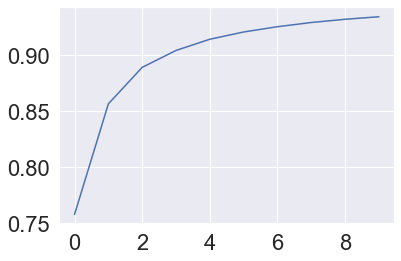

In [72]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_train) for tree in model_1.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_train[0]

plt.plot([
    metrics.r2_score(y_train, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 11)
])

In [73]:
model_2=RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)
model_2.fit(X_train,y_train)
print_score(model_2, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1686
RMSE on test set: 0.4206
R^2 on train set: 0.9445
R^2 on test set: 0.6589


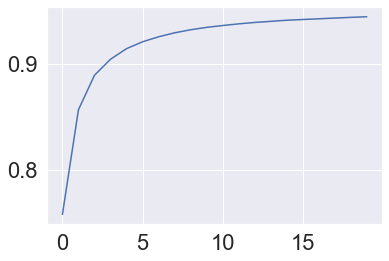

In [74]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_train) for tree in model_2.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_train[0]

plt.plot([
    metrics.r2_score(y_train, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 21)
])

In [75]:
model_3=RandomForestRegressor(n_estimators = 30, n_jobs = -1, random_state = 42)
model_3.fit(X_train,y_train)
print_score(model_3, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1636
RMSE on test set: 0.4175
R^2 on train set: 0.9477
R^2 on test set: 0.6639


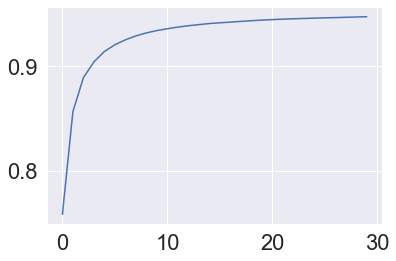

In [76]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_train) for tree in model_3.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_train[0]

plt.plot([
    metrics.r2_score(y_train, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 31)
])

L'allure de la courbe suggère qu'ajouter plus d'arbres ne va pas aider à améliorer nos résultats. Tentons de vérifier si c'est le cas. 

In [77]:
model_4=RandomForestRegressor(n_estimators = 40, n_jobs = -1, random_state = 42)
model_4.fit(X_train,y_train)
print_score(model_4, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1609
RMSE on test set: 0.4158
R^2 on train set: 0.9494
R^2 on test set: 0.6665


In [78]:
model_5=RandomForestRegressor(n_estimators = 50, n_jobs = -1, random_state = 42)
model_5.fit(X_train,y_train)
print_score(model_5, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1595
RMSE on test set: 0.4140
R^2 on train set: 0.9503
R^2 on test set: 0.6695


In [79]:
model_6=RandomForestRegressor(n_estimators = 60, n_jobs = -1, random_state = 42)
model_6.fit(X_train,y_train)
print_score(model_6, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1584
RMSE on test set: 0.4135
R^2 on train set: 0.9510
R^2 on test set: 0.6702


On peut déduire que le bon nombre d'arbres va se trouver dans cette tranche : [20,30]

### 2. Estimation of a range for min_samples_leaf

#### 1. min_samples_leaf = 3

In [80]:
model = RandomForestRegressor(n_estimators = 20, min_samples_leaf = 3, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2607
RMSE on test set: 0.4100
R^2 on train set: 0.8673
R^2 on test set: 0.6759


In [81]:
model = RandomForestRegressor(n_estimators = 25, min_samples_leaf = 3, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2596
RMSE on test set: 0.4086
R^2 on train set: 0.8684
R^2 on test set: 0.6781


In [82]:
model = RandomForestRegressor(n_estimators = 30, min_samples_leaf = 3, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2587
RMSE on test set: 0.4081
R^2 on train set: 0.8693
R^2 on test set: 0.6788


#### 2. min_samples_leaf = 5

In [83]:
model = RandomForestRegressor(n_estimators = 20, min_samples_leaf = 5, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3061
RMSE on test set: 0.4086
R^2 on train set: 0.8171
R^2 on test set: 0.6780


In [84]:
model = RandomForestRegressor(n_estimators = 25, min_samples_leaf = 5, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3050
RMSE on test set: 0.4073
R^2 on train set: 0.8183
R^2 on test set: 0.6801


In [85]:
model = RandomForestRegressor(n_estimators = 30, min_samples_leaf = 5, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3044
RMSE on test set: 0.4069
R^2 on train set: 0.8190
R^2 on test set: 0.6807


#### 2. min_samples_leaf = 10

In [86]:
model = RandomForestRegressor(n_estimators = 20, min_samples_leaf = 10 , n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3512
RMSE on test set: 0.4085
R^2 on train set: 0.7591
R^2 on test set: 0.6782


In [87]:
model = RandomForestRegressor(n_estimators = 25, min_samples_leaf = 10, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3507
RMSE on test set: 0.4084
R^2 on train set: 0.7598
R^2 on test set: 0.6784


In [88]:
model = RandomForestRegressor(n_estimators = 30, min_samples_leaf = 10, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3503
RMSE on test set: 0.4080
R^2 on train set: 0.7603
R^2 on test set: 0.6789


On peut tester avec un min_sample_leaf entre [3,5]

### 3. Estimation of a range for max depth 

In [123]:
model = RandomForestRegressor(
    n_estimators = 30,
    min_samples_leaf = 3,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2587
RMSE on test set: 0.4081
R^2 on train set: 0.8693
R^2 on test set: 0.6788


In [110]:
model = RandomForestRegressor(n_estimators = 20, max_depth=10, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3978
RMSE on test set: 0.4248
R^2 on train set: 0.6910
R^2 on test set: 0.6520


In [111]:
model = RandomForestRegressor(n_estimators = 20, max_depth=15, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3119
RMSE on test set: 0.4147
R^2 on train set: 0.8100
R^2 on test set: 0.6683


In [112]:
model = RandomForestRegressor(n_estimators = 20, max_depth=30, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1715
RMSE on test set: 0.4202
R^2 on train set: 0.9426
R^2 on test set: 0.6595


In [113]:
model = RandomForestRegressor(n_estimators = 30, max_depth=10, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3973
RMSE on test set: 0.4240
R^2 on train set: 0.6918
R^2 on test set: 0.6532


In [114]:
model = RandomForestRegressor(n_estimators = 30, max_depth=15, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3102
RMSE on test set: 0.4133
R^2 on train set: 0.8121
R^2 on test set: 0.6706


In [115]:
model = RandomForestRegressor(n_estimators = 30, max_depth=20, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2287
RMSE on test set: 0.4146
R^2 on train set: 0.8978
R^2 on test set: 0.6685


On devrait utiliser max_depth = 'None' ou 15 car nous ne voyons pas de changements significatifs avec l'utilisation de diverses métriques.

## 3.OOB-SCORE

### 1. First test

In [130]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_leaf=3,
    max_features='auto',
    max_depth=None,
    max_samples=None,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 16.6 s, sys: 224 ms, total: 16.8 s
Wall time: 7.17 s
RMSE on train set: 0.2587
RMSE on test set: 0.4081
R^2 on train set: 0.8693
R^2 on test set: 0.6788
R^2 on oob set: 0.6588


Nous sommes en over-fitting

### 2. Reducing overfitting : Estimation of min_samples_split

In [135]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='auto',
    max_depth=None,
    max_samples=None,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 15.1 s, sys: 143 ms, total: 15.3 s
Wall time: 5.58 s
RMSE on train set: 0.3044
RMSE on test set: 0.4069
R^2 on train set: 0.8190
R^2 on test set: 0.6807
R^2 on oob set: 0.6640


In [137]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_split=3,
    min_samples_leaf=10,
    max_features='auto',
    max_depth=None,
    max_samples=None,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 13.6 s, sys: 88.2 ms, total: 13.7 s
Wall time: 4.68 s
RMSE on train set: 0.3503
RMSE on test set: 0.4080
R^2 on train set: 0.7603
R^2 on test set: 0.6789
R^2 on oob set: 0.6664


In [141]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_split=10,
    min_samples_leaf=8,
    max_features='auto',
    max_depth=None,
    max_samples=None,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 14.1 s, sys: 87.2 ms, total: 14.2 s
Wall time: 4.18 s
RMSE on train set: 0.3376
RMSE on test set: 0.4072
R^2 on train set: 0.7774
R^2 on test set: 0.6803
R^2 on oob set: 0.6661


max_samples_split : on peut tester 8,9,10

### 6. Reducing overfitting : Estimation of a range for max_features

On teste : 0.5, 0.75, 'sqrt', 'log2'

#### 1. max_features = 'sqrt'

In [89]:
model = RandomForestRegressor(n_estimators = 20,  max_features = 'sqrt', n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1696
RMSE on test set: 0.4207
R^2 on train set: 0.9439
R^2 on test set: 0.6586


In [90]:
model = RandomForestRegressor(n_estimators = 25,  max_features = 'sqrt', n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1664
RMSE on test set: 0.4188
R^2 on train set: 0.9459
R^2 on test set: 0.6618


In [91]:
model = RandomForestRegressor(n_estimators = 30,  max_features = 'sqrt', n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1642
RMSE on test set: 0.4176
R^2 on train set: 0.9474
R^2 on test set: 0.6636


#### max_features = 'log2'

In [92]:
model = RandomForestRegressor(n_estimators = 20,  max_features = 'log2', n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1704
RMSE on test set: 0.4205
R^2 on train set: 0.9433
R^2 on test set: 0.6590


In [93]:
model = RandomForestRegressor(n_estimators = 25,  max_features = 'log2', n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1671
RMSE on test set: 0.4190
R^2 on train set: 0.9454
R^2 on test set: 0.6614


In [94]:
model = RandomForestRegressor(n_estimators = 30,  max_features = 'log2', n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1652
RMSE on test set: 0.4186
R^2 on train set: 0.9467
R^2 on test set: 0.6621


#### max_features = 0.5

In [95]:
model = RandomForestRegressor(n_estimators = 20,  max_features = 0.5, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1677
RMSE on test set: 0.4166
R^2 on train set: 0.9451
R^2 on test set: 0.6653


In [96]:
model = RandomForestRegressor(n_estimators = 25,  max_features = 0.5, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1648
RMSE on test set: 0.4144
R^2 on train set: 0.9470
R^2 on test set: 0.6689


In [97]:
model = RandomForestRegressor(n_estimators = 30,  max_features = 0.5, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1627
RMSE on test set: 0.4134
R^2 on train set: 0.9483
R^2 on test set: 0.6704


#### 4. max_features = 0.75

In [99]:
model = RandomForestRegressor(n_estimators = 30,  max_features = 0.75, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1630
RMSE on test set: 0.4137
R^2 on train set: 0.9481
R^2 on test set: 0.6699


In [100]:
model = RandomForestRegressor(n_estimators = 40,  max_features = 0.75, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1603
RMSE on test set: 0.4117
R^2 on train set: 0.9498
R^2 on test set: 0.6731


In [101]:
model = RandomForestRegressor(n_estimators = 40, n_jobs = -1, random_state = 42)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.1609
RMSE on test set: 0.4158
R^2 on train set: 0.9494
R^2 on test set: 0.6665


On devrait utiliser max_features = 'auto'.

### 7. Reducing overfitting : Estimation of a range for max_samples

In [116]:
model = RandomForestRegressor(
    n_estimators = 25,
    min_samples_leaf = 3,
    max_samples = 0.5,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3139
RMSE on test set: 0.4082
R^2 on train set: 0.8076
R^2 on test set: 0.6786


In [117]:
model = RandomForestRegressor(
    n_estimators = 25,
    min_samples_leaf = 3,
    max_samples = 0.75,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2827
RMSE on test set: 0.4087
R^2 on train set: 0.8439
R^2 on test set: 0.6779


In [123]:
model = RandomForestRegressor(
    n_estimators = 30,
    min_samples_leaf = 3,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2587
RMSE on test set: 0.4081
R^2 on train set: 0.8693
R^2 on test set: 0.6788


In [121]:
model = RandomForestRegressor(
    n_estimators = 30,
    min_samples_leaf = 3,
    max_samples = 0.25,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3556
RMSE on test set: 0.4101
R^2 on train set: 0.7531
R^2 on test set: 0.6757


In [120]:
model = RandomForestRegressor(
    n_estimators = 30,
    min_samples_leaf = 3,
    max_samples = 0.5,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3127
RMSE on test set: 0.4075
R^2 on train set: 0.8091
R^2 on test set: 0.6797


In [119]:
model = RandomForestRegressor(
    n_estimators = 30,
    min_samples_leaf = 3,
    max_samples = 0.75,
    n_jobs = -1, 
    random_state = 42,
)
model.fit(X_train,y_train)
print_score(model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.2819
RMSE on test set: 0.4077
R^2 on train set: 0.8448
R^2 on test set: 0.6794


max_samples : 'None' ou 0.5

### 8. Second OOB-SCORE

In [143]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_leaf=3,
    max_features='auto',
    max_depth=15,
    max_samples=0.5,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)


%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 8.38 s, sys: 68.9 ms, total: 8.45 s
Wall time: 2.66 s
RMSE on train set: 0.3524
RMSE on test set: 0.4101
R^2 on train set: 0.7574
R^2 on test set: 0.6756
R^2 on oob set: 0.6654


In [145]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_leaf=3,
    min_samples_split=10,
    max_features='auto',
    max_depth=15,
    max_samples=0.5,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)


%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 8.24 s, sys: 83.6 ms, total: 8.32 s
Wall time: 2.96 s
RMSE on train set: 0.3602
RMSE on test set: 0.4099
R^2 on train set: 0.7467
R^2 on test set: 0.6760
R^2 on oob set: 0.6661


In [148]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_leaf=3,
    min_samples_split=10,
    max_features='auto',
    max_depth=10,
    max_samples=0.5,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)


%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 6.14 s, sys: 51.1 ms, total: 6.19 s
Wall time: 1.99 s
RMSE on train set: 0.4034
RMSE on test set: 0.4223
R^2 on train set: 0.6822
R^2 on test set: 0.6561
R^2 on oob set: 0.6485


In [147]:
model = RandomForestRegressor(
    #Criteras
    n_estimators = 30,
    min_samples_leaf=3,
    min_samples_split=10,
    max_features='auto',
    max_depth=10,
    max_samples=0.25,

    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)


%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 3.76 s, sys: 54.4 ms, total: 3.82 s
Wall time: 1.5 s
RMSE on train set: 0.4079
RMSE on test set: 0.4234
R^2 on train set: 0.6750
R^2 on test set: 0.6543
R^2 on oob set: 0.6491


## 4. Cross validation

In [150]:
#Premier modèle sans les critères d'over-fitting
model = RandomForestRegressor(
    n_estimators = 30,
    min_samples_leaf=3,
    max_features='auto',
    
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 13.6 s, sys: 103 ms, total: 13.7 s
Wall time: 4.06 s
RMSE on train set: 0.2819
RMSE on test set: 0.4077
R^2 on train set: 0.8448
R^2 on test set: 0.6794
R^2 on oob set: 0.6635


In [155]:
scores = cross_val_score(model, X_train, y_train, cv = 8, scoring = 'r2', n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.66516 0.65867 0.66773 0.66835 0.67456 0.6694  0.6748  0.67431]
r2 is 0.669 with a standard deviation of 0.005


In [156]:
scores = cross_val_score(model, X_train, y_train, cv = 8, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

print(scores)
print("RMSE is {:.3f} with a standard deviation of {:.3f}".format(-scores.mean(), scores.std()))

[-0.41977 -0.41582 -0.40901 -0.40988 -0.41772 -0.40483 -0.40755 -0.40764]
RMSE is 0.412 with a standard deviation of 0.005


## 5. GridSearch

In [160]:
param_grid = {'n_estimators': [20, 25, 30],
              'min_samples_leaf': [3,5],
              'max_depth':[None,10,15],
              'max_features':['auto'],
              'max_depth':[None,15],
              'max_samples':[None,0.5,0.25],
              'min_samples_split':[3,7,10]
             
             }

model = RandomForestRegressor(
    random_state = 42,
    bootstrap = True,
)

In [161]:
tuned_model = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = None, # uses estimator's default score method
    n_jobs = -1, 
    refit = True, # keep a fitted version of the overall best model
    cv = 5, 
    return_train_score = True,
    verbose = 2,
)

In [162]:
tuned_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 15], 'max_features': ['auto'],
                         'max_samples': [None, 0.5, 0.25],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 7, 10],
                         'n_estimators': [20, 25, 30]},
             return_train_score=True, verbose=2)

In [163]:
best_model = tuned_model.best_estimator_
best_model

RandomForestRegressor(min_samples_leaf=5, min_samples_split=3, n_estimators=30,
                      random_state=42)

In [164]:
print_score(best_model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3044
RMSE on test set: 0.4069
R^2 on train set: 0.8190
R^2 on test set: 0.6807


## 6. Hyperparameter tuning for final model selection

In [191]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [165]:
param_grid = [{'n_estimators': [25, 30, 35],
              'min_samples_leaf': [3,5],
              'max_depth':[None,10,15],
              'max_features':['auto'],
              'max_depth':[None,15],
              'max_samples':[None,0.5,0.25],
              'min_samples_split':[3,7,10]}
]

model = RandomForestRegressor(
    random_state = 42,
    bootstrap = True,
)

In [166]:
tuned_model = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = None, # uses estimator's default score method
    n_jobs = -1, 
    refit = True, # keep a fitted version of the overall best model
    cv = 5, 
    return_train_score = True,
    verbose = 2,
)

In [168]:
tuned_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [None, 15], 'max_features': ['auto'],
                          'max_samples': [None, 0.5, 0.25],
                          'min_samples_leaf': [3, 5],
                          'min_samples_split': [3, 7, 10],
                          'n_estimators': [25, 30, 35]}],
             return_train_score=True, verbose=2)

In [169]:
best_model = tuned_model.best_estimator_
best_model

RandomForestRegressor(max_samples=0.5, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=35, random_state=42)

In [171]:
print_score(best_model, X_train, y_train, X_test, y_test)

RMSE on train set: 0.3291
RMSE on test set: 0.4061
R^2 on train set: 0.7885
R^2 on test set: 0.6820


In [172]:
# randomized splitting strategy
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(best_model, X_train, y_train, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.65923 0.6752  0.66314 0.68012 0.67141]
r2 is 0.670 with a standard deviation of 0.008


# IV. Random forest feature importance

In [173]:
model = RandomForestRegressor(
    max_samples=0.5, 
    min_samples_leaf=3, 
    min_samples_split=10,
    n_estimators=35,
    
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)


%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)

CPU times: user 11.4 s, sys: 122 ms, total: 11.5 s
Wall time: 5.95 s
RMSE on train set: 0.3291
RMSE on test set: 0.4061
R^2 on train set: 0.7885
R^2 on test set: 0.6820
R^2 on oob set: 0.6706


In [174]:
model.feature_importances_

array([0.44297, 0.0457 , 0.03585, 0.12613, 0.00148, 0.01125, 0.00764, 0.00016, 0.00703, 0.01751, 0.00662,
       0.00564, 0.01067, 0.03349, 0.03268, 0.14317, 0.0337 , 0.00736, 0.00473, 0.0008 , 0.00372, 0.     ,
       0.     , 0.00096, 0.00046, 0.00131, 0.01376, 0.00124, 0.00109, 0.00287])

In [177]:
def rf_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance

feat_importance = rf_feat_importance(model, X_train)
feat_importance[:20]

cols       imp
0                 room_type  0.442967
15                  zipcode  0.143169
3                 bathrooms  0.126134
1                 amenities  0.045702
2              accommodates  0.035854
16                 bedrooms  0.033701
13        number_of_reviews  0.033494
14     review_scores_rating  0.032676
9        host_response_rate  0.017514
26                  city_DC  0.013756
5       cancellation_policy  0.011252
12                longitude  0.010674
6              cleaning_fee  0.007637
17                     beds  0.007356
8    host_identity_verified  0.007028
10         instant_bookable  0.006622
11                 latitude  0.005642
18  property_type_Apartment  0.004729
20      property_type_House  0.003724
29                  city_SF  0.002871

In [178]:
df['room_type'].value_counts()

2    40752
1    30237
0     2135
Name: room_type, dtype: int64

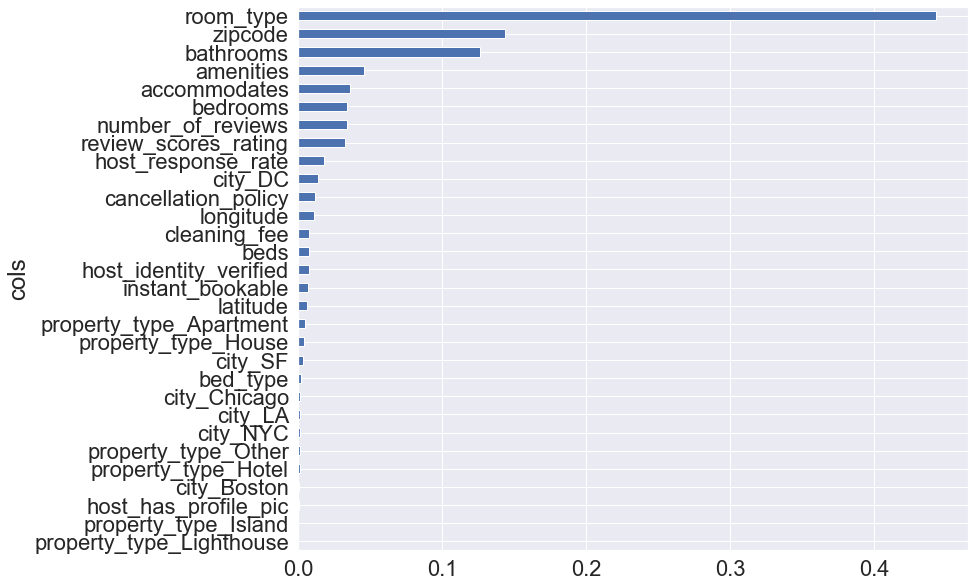

In [179]:
barh = feat_importance[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
barh = barh.invert_yaxis()
barh

In [180]:
to_keep = feat_importance[feat_importance.imp > 0.01].cols
len(to_keep)

12

In [182]:
# perform ablation of columns with low importance
X = df[to_keep].copy()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [193]:
model = RandomForestRegressor(
    min_samples_leaf=3, 
    n_estimators=50,
    min_samples_split=10,
    max_samples=0.5, 
    
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True,
)


%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test)


CPU times: user 10.4 s, sys: 87.3 ms, total: 10.5 s
Wall time: 4.21 s
RMSE on train set: 0.3344
RMSE on test set: 0.4082
R^2 on train set: 0.7816
R^2 on test set: 0.6786
R^2 on oob set: 0.6699


# Conclusion

Meilleur modèle :
RandomForestRegressor(max_samples=0.5, 
min_samples_leaf=3, 
min_samples_split=10,
n_estimators=35)

Ce modèle permet d'avoir le meilleur compris entre le R^2 du train/test/OOB :
- R^2 on train set: 0.7885
- R^2 on test set: 0.6820
- R^2 on oob set: 0.6706

Ainsi notre meilleur score est de 0.68, ce qui correspond aux résultats trouvés en moyenne lors de la compétition Kaggle